# Image classification using zalando's Fashion-MNIST  Dataset

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.


Labels

Each training and test example is assigned to one of the following labels:

* 0 - T-shirt/top
* 1 - Trouser
* 2 - Pullover
* 3 - Dress
* 4 - Coat
* 5 - Sandal
* 6 - Shirt
* 7 - Sneaker
* 8 - Bag
* 9 - Ankle boot



Each row is a separate image
Column 1 is the class label.
Remaining columns are pixel numbers (784 total).
Each value is the darkness of the pixel (1 to 255)

Acknowledgements
Original dataset was downloaded from https://github.com/zalandoresearch/fashion-mnist


# Table of Contents

* Import python libraries
* Import dataset
* Dataset properties
* Creating validation dataset
* Visualization - Plots
* Data reshape and Augmentation
* Modeling and Results


# Import Python libraries

## Initial setup

## Import the required libraries and the dataset

In [ ]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from time import time
import random
import itertools
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import plot_model
from keras.layers import Dropout
import math

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Import Dataset

We'll need TensorFlow Datasets, an API that simplifies downloading and accessing datasets, and provides several sample datasets to work with.



In [ ]:
# Import dataset

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# shape of data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
# data type of dataset
X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

Loading the dataset returns metadata as well as a training dataset and test dataset.

The model is trained using train_dataset.
The model is tested against test_dataset.
The images are 28  ×  28 arrays, with pixel values in the range [0, 255]. The labels are an array of integers, in the range [0, 9]. These correspond to the class of clothing the image represents:

Label	Class

* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot


Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

# Creating Training and validation dataset

The value of each pixel in the image data is an integer in the range [0,255]. For the model to work properly, these values need to be normalized to the range [0,1]. So here we create a normalization function, and then apply it to each image in the test and train datasets.



In [ ]:
#creating validation data and scaling data to range 0-1
X_valid, X_train = X_train[:5000] / 255., X_train[5000:] / 255.
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test / 255.

# Assigning class labels

In [ ]:
# Assingning class labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Visualization - plots

## Data Visualization and augmentation

Display the first 25 images from the training set and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.



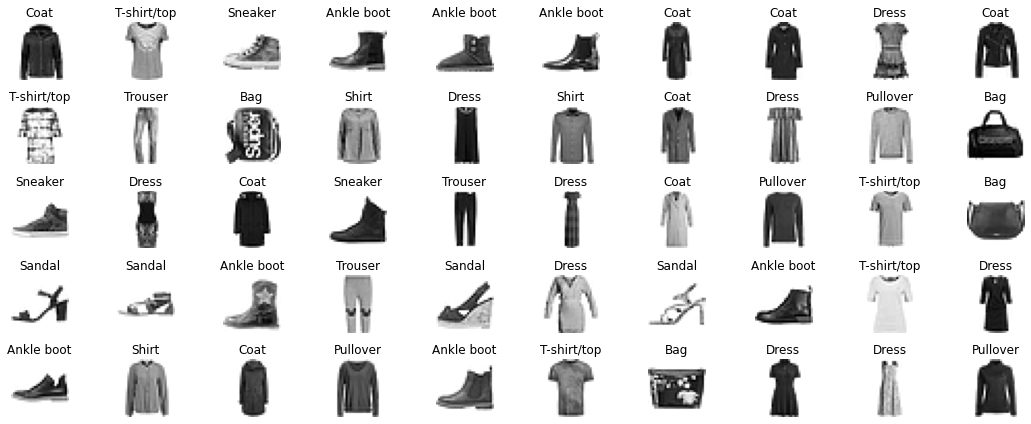

In [ ]:
# Plot at least two sample for each data class
plt.figure(figsize=(15, 6))
n_rows = 5
n_cols = 10

for i in range(n_rows * n_cols):
    ax = plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(X_train[i], cmap='binary')
    plt.axis('off')
    plt.title(class_names[y_train[i]], fontdict={'fontsize': 12, 'color': 'black'})
    
plt.tight_layout()
plt.show()

# Reshaping data and Data Augmentation


### Apply rotation and height shift augmentation (rotation_range, height_shift_range) to the dataset separately. Print the augmented image and the original image for each class and each augmentation

### Bring the train and test data in the required format.

In [ ]:
# Convert to the tensor shape
X_Aug = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')

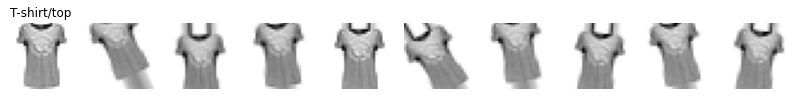

<Figure size 432x288 with 0 Axes>

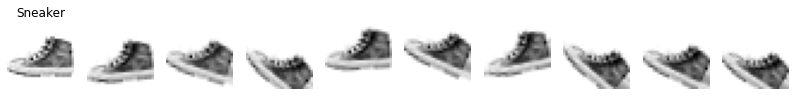

<Figure size 432x288 with 0 Axes>

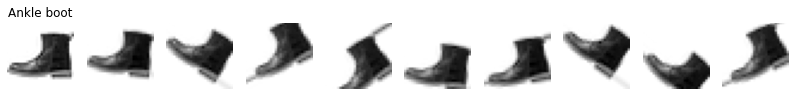

<Figure size 432x288 with 0 Axes>

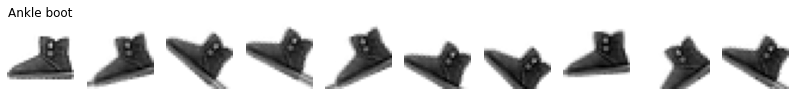

<Figure size 432x288 with 0 Axes>

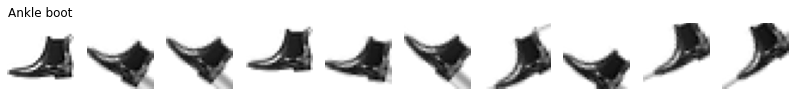

<Figure size 432x288 with 0 Axes>

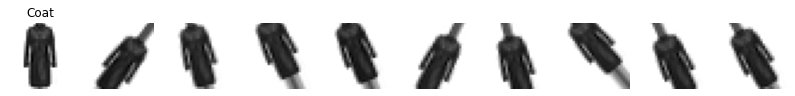

<Figure size 432x288 with 0 Axes>

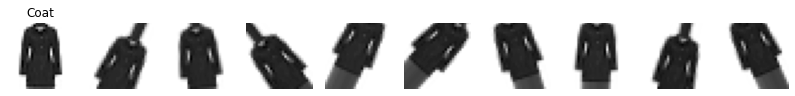

<Figure size 432x288 with 0 Axes>

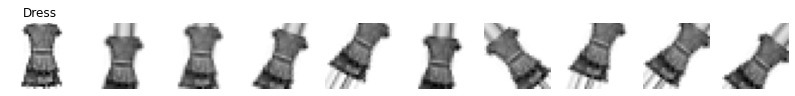

<Figure size 432x288 with 0 Axes>

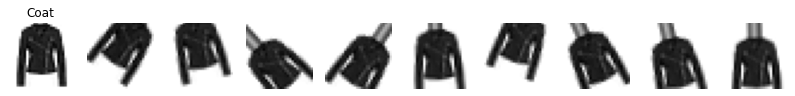

<Figure size 432x288 with 0 Axes>

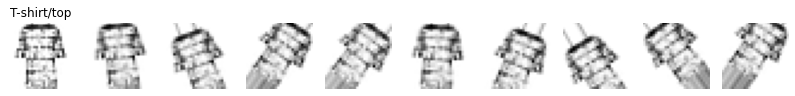

<Figure size 432x288 with 0 Axes>

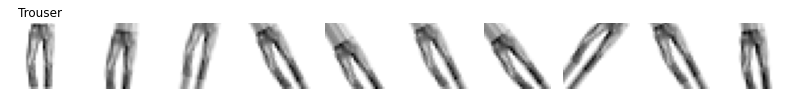

<Figure size 432x288 with 0 Axes>

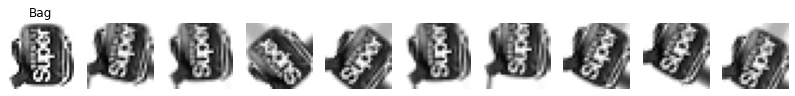

<Figure size 432x288 with 0 Axes>

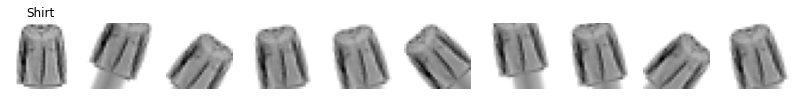

<Figure size 432x288 with 0 Axes>

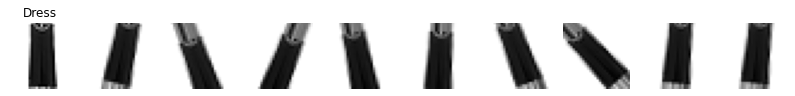

<Figure size 432x288 with 0 Axes>

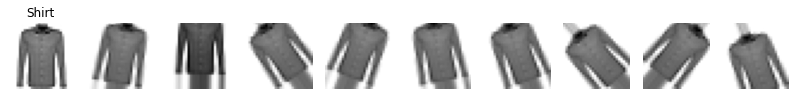

<Figure size 432x288 with 0 Axes>

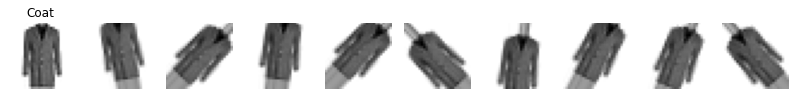

<Figure size 432x288 with 0 Axes>

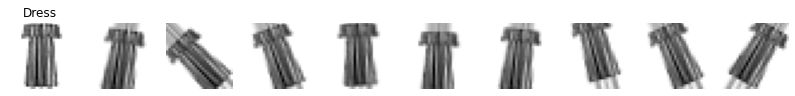

<Figure size 432x288 with 0 Axes>

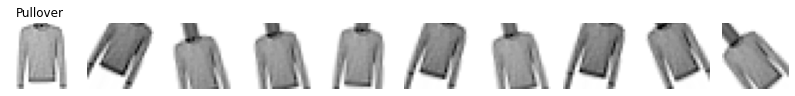

<Figure size 432x288 with 0 Axes>

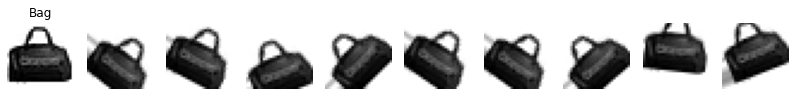

<Figure size 432x288 with 0 Axes>

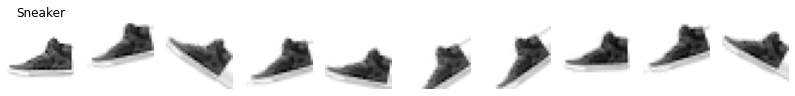

<Figure size 432x288 with 0 Axes>

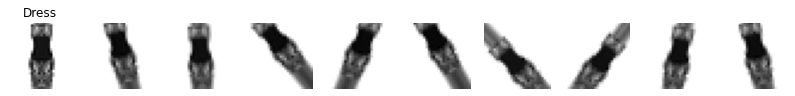

<Figure size 432x288 with 0 Axes>

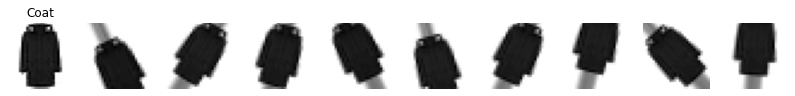

<Figure size 432x288 with 0 Axes>

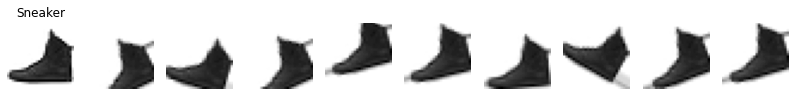

<Figure size 432x288 with 0 Axes>

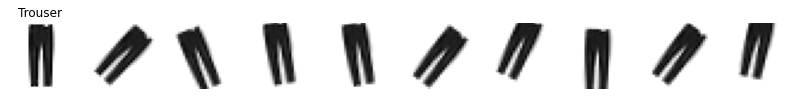

<Figure size 432x288 with 0 Axes>

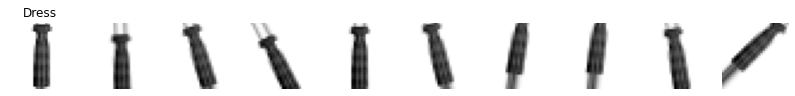

<Figure size 432x288 with 0 Axes>

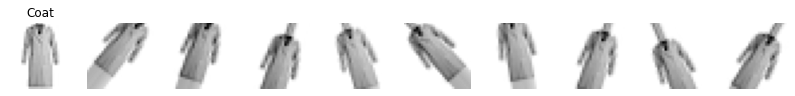

<Figure size 432x288 with 0 Axes>

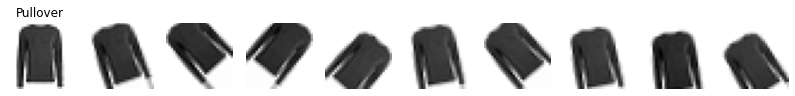

<Figure size 432x288 with 0 Axes>

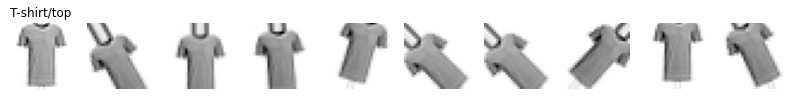

<Figure size 432x288 with 0 Axes>

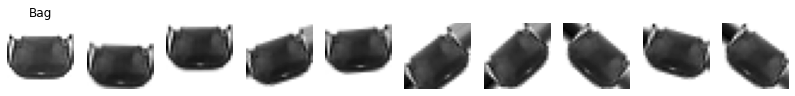

<Figure size 432x288 with 0 Axes>

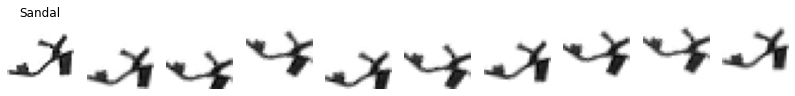

<Figure size 432x288 with 0 Axes>

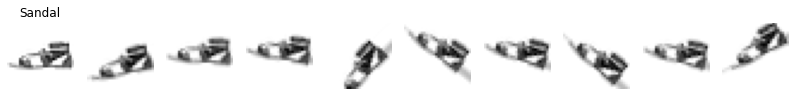

<Figure size 432x288 with 0 Axes>

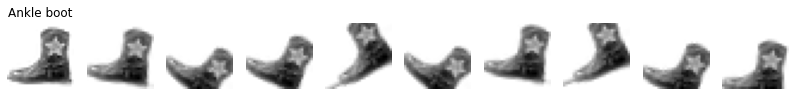

<Figure size 432x288 with 0 Axes>

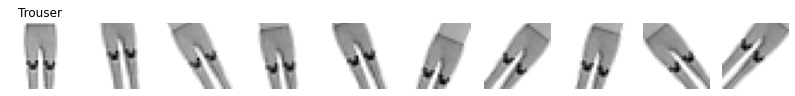

<Figure size 432x288 with 0 Axes>

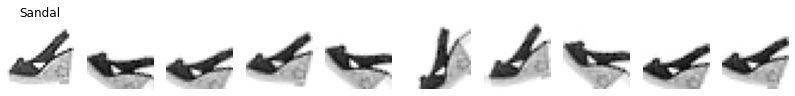

<Figure size 432x288 with 0 Axes>

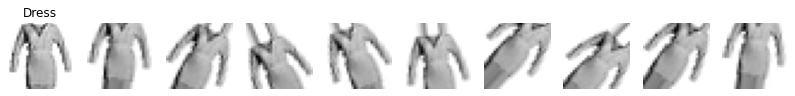

<Figure size 432x288 with 0 Axes>

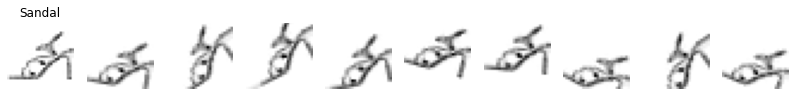

<Figure size 432x288 with 0 Axes>

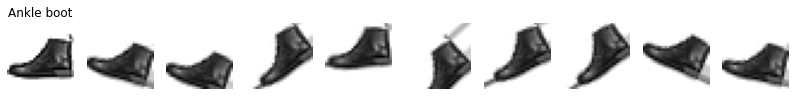

<Figure size 432x288 with 0 Axes>

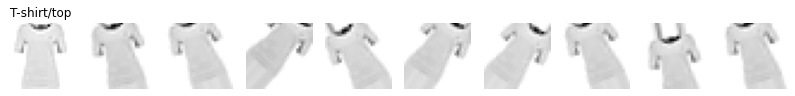

<Figure size 432x288 with 0 Axes>

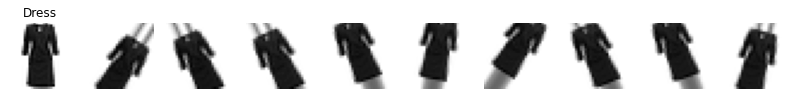

<Figure size 432x288 with 0 Axes>

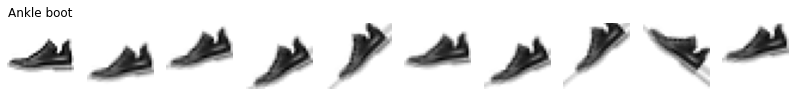

<Figure size 432x288 with 0 Axes>

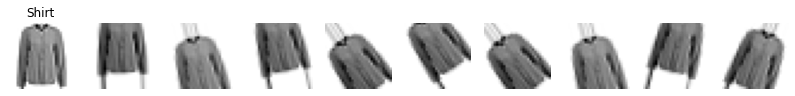

<Figure size 432x288 with 0 Axes>

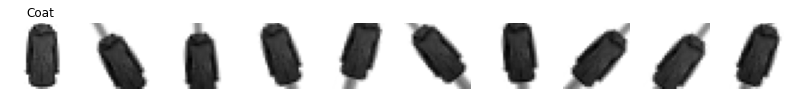

<Figure size 432x288 with 0 Axes>

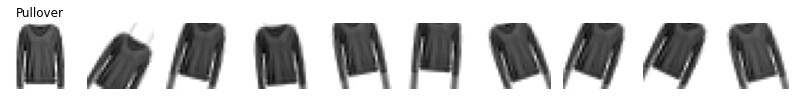

<Figure size 432x288 with 0 Axes>

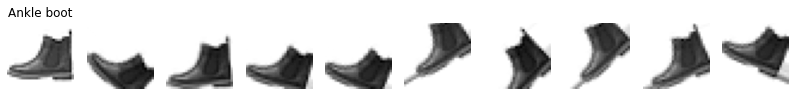

<Figure size 432x288 with 0 Axes>

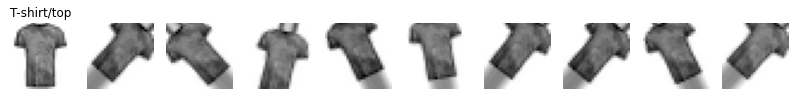

<Figure size 432x288 with 0 Axes>

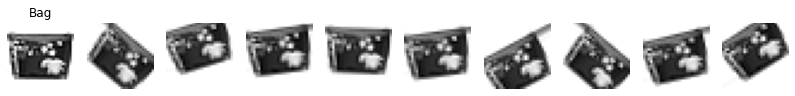

<Figure size 432x288 with 0 Axes>

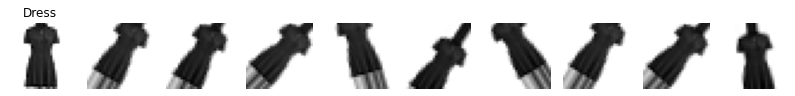

<Figure size 432x288 with 0 Axes>

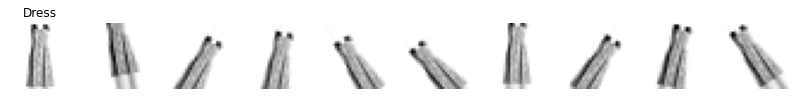

<Figure size 432x288 with 0 Axes>

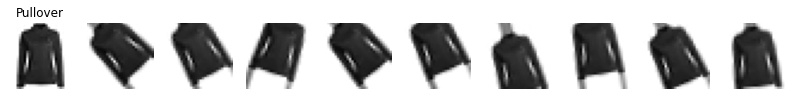

<Figure size 432x288 with 0 Axes>

In [ ]:
#data augmentation
datagen = ImageDataGenerator(rotation_range=45,height_shift_range=0.2)
datagen.fit(X_Aug)
for i in range(1,50):
    plt.figure(figsize=(14, 6))
    augment = datagen.flow(X_Aug[i:i+1], batch_size=1)
    plt.subplot(1,10,1)
    plt.imshow(X_train[i], cmap='binary')
    plt.title(class_names[int(y_train[i:i+1])], fontdict={'fontsize': 12, 'color': 'black'})
    plt.axis('off')
    for j in range(1, 10):
        plt.subplot(1,10,j+1)
        plt.imshow(augment.next().squeeze(),cmap='binary')
        plt.axis('off')
    plt.show()
    plt.tight_layout()

### Print the shapes of train and test data

In [ ]:
# shape of data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55000, 28, 28), (10000, 28, 28), (55000,), (10000,))

# Modeling

### Model Building
Building the neural network requires configuring the layers of the model, then compiling the model.



##  Choosing Hidden Layers

### Sequential Model layers- Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.
### Add L2 regularization to all the layers.
### Add one layer of dropout at the appropriate position and give reasons.
### Choose the appropriate activation function for all the layers.

The basic building block of a neural network is the layer. A layer extracts a representation from the data fed into it. Hopefully, a series of connected layers results in a representation that is meaningful for the problem at hand.

Much of deep learning consists of chaining together simple layers. Most layers, like tf.keras.layers.Dense, have internal parameters which are tuned ("learned") during training.

* If the data is linearly separable we don't need any hidden layers. 
* If data is less complex and is having fewer dimensions or features then neural networks with 1 to 2 hidden layers would work.
If data is having large dimensions or features then to get an optimum solution, 3 to 5 hidden layers can be used. 
* It should be kept in mind that increasing hidden layers would also increase the complexity of the model and choosing hidden layers such as 8, 9, or in two digits may sometimes lead to overfitting.





Usually, dropout is placed on the fully connected layers only because they are the one with the greater number of parameters and thus they're likely to excessively co-adapting themselves causing overfitting.

## Model Initialization and compilation

In [ ]:
def initialise():
  model = keras.models.Sequential([
      keras.layers.Flatten(input_shape = [28, 28]),
      keras.layers.Dense(128, activation = 'relu',kernel_regularizer=regularizers.l2(0.01)),
      keras.layers.Dropout(.2),
      keras.layers.Dense(70, activation = 'relu',kernel_regularizer=regularizers.l2(0.01)),
      keras.layers.Dense(50, activation = 'relu',kernel_regularizer=regularizers.l2(0.01)),
      keras.layers.Dense(20, activation = 'relu',kernel_regularizer=regularizers.l2(0.01)),
      keras.layers.Dense(10, activation = 'softmax')
  ])
  return model

Adam works well in practice and outperforms other Adaptive techniques. Adam: Adaptive moment estimation is best of both worlds i.e. Adam = RMSprop + Momentum
Some advantages of Adam include:
* Relatively low memory requirements (though higher than gradient descent and gradient descent with momentum)
* Usually works well even with little tuning of hyperparameters.

In [ ]:
for i in [1,0.1,0.01,0.001,0.0001,0.00001]:
  model = initialise()
  model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=i), metrics = ['accuracy'])
  print("Learning rate = ",i)
  model_fit = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 1,batch_size=32,verbose=1)

Learning rate =  1
1719/1719 [==============================] - 7s 3ms/step - loss: 6678.7422 - accuracy: 0.1037 - val_loss: 765.6140 - val_accuracy: 0.0976
Learning rate =  0.1
1719/1719 [==============================] - 6s 3ms/step - loss: 3.4885 - accuracy: 0.0990 - val_loss: 2.3315 - val_accuracy: 0.0914
Learning rate =  0.01
1719/1719 [==============================] - 6s 3ms/step - loss: 1.4273 - accuracy: 0.5834 - val_loss: 1.1638 - val_accuracy: 0.6376
Learning rate =  0.001
1719/1719 [==============================] - 6s 3ms/step - loss: 1.4003 - accuracy: 0.7429 - val_loss: 0.9686 - val_accuracy: 0.7872
Learning rate =  0.0001
1719/1719 [==============================] - 7s 4ms/step - loss: 3.0523 - accuracy: 0.6645 - val_loss: 1.9153 - val_accuracy: 0.7814
Learning rate =  1e-05
1719/1719 [==============================] - 6s 3ms/step - loss: 5.5590 - accuracy: 0.2567 - val_loss: 4.8310 - val_accuracy: 0.4180


Chosing learning rate = 0.0001 as it converged faster.
Generally batch size of 32 is good, with epochs = 100

In [ ]:
#initialise the model
model = initialise()

# summary of model
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 70)                9030      
_________________________________________________________________
dense_67 (Dense)             (None, 50)                3550      
_________________________________________________________________
dense_68 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_69 (Dense)             (None, 10)              

# Model Compilation
### Compile the model with the appropriate loss function.
### Use an appropriate optimizer. Give reasons for the choice of learning rate and its value.
### Use accuracy as a metric.

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

Loss function — An algorithm for measuring how far the model's outputs are from the desired output. The goal of training is this measures loss.
Optimizer —An algorithm for adjusting the inner parameters of the model in order to minimize loss.
Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [ ]:
# compiling model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), metrics = ['accuracy'])

# Model Training
### Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.
### Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training.

In [ ]:
#fitting model
start=time()
model_fit = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 100, batch_size=32)
totaltime = time() - start

Epoch 1/100
1719/1719 [==============================] - 7s 3ms/step - loss: 2.9672 - accuracy: 0.6569 - val_loss: 1.7935 - val_accuracy: 0.7994
Epoch 2/100
1719/1719 [==============================] - 7s 4ms/step - loss: 1.5738 - accuracy: 0.7883 - val_loss: 1.3327 - val_accuracy: 0.8224
Epoch 3/100
1719/1719 [==============================] - 11s 6ms/step - loss: 1.2868 - accuracy: 0.8046 - val_loss: 1.1581 - val_accuracy: 0.8324
Epoch 4/100
1719/1719 [==============================] - 7s 4ms/step - loss: 1.1553 - accuracy: 0.8117 - val_loss: 1.0752 - val_accuracy: 0.8224
Epoch 5/100
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0751 - accuracy: 0.8166 - val_loss: 1.0177 - val_accuracy: 0.8258
Epoch 6/100
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0194 - accuracy: 0.8201 - val_loss: 0.9540 - val_accuracy: 0.8384
Epoch 7/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.9787 - accuracy: 0.8228 - val_loss: 0.9198 - val_a

In [ ]:
print("Time taken for training", totaltime,"seconds")

Time taken for training 622.5396003723145 seconds


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.87 (or 87%) on the training data.

In [ ]:
print(model_fit.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Evaluate Accuracy
Next, compare how the model performs on the test dataset. Use all examples we have in the test dataset to assess accuracy.

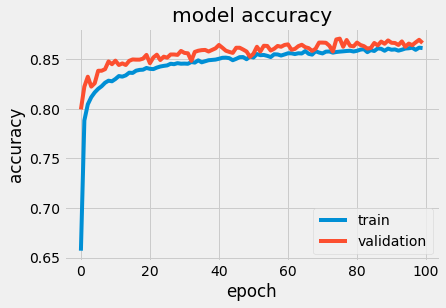

In [ ]:
plt.style.use('fivethirtyeight')
#  "Accuracy"
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

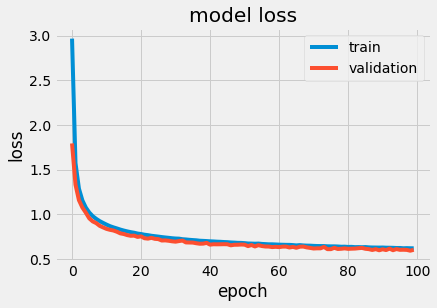

In [ ]:
# "Loss"
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

# Model Evaluation

###Print the final train and validation loss and accuracy.Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class.
### Print the two most incorrectly classified images for each class in the test dataset.

In [ ]:
# evaluating model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6378 - accuracy: 0.8512


[0.6378464102745056, 0.8511999845504761]

In [ ]:
# evaluating model
model.evaluate(X_train, y_train)

1719/1719 [==============================] - 4s 2ms/step - loss: 0.5958 - accuracy: 0.8695


[0.5958303809165955, 0.8694727420806885]

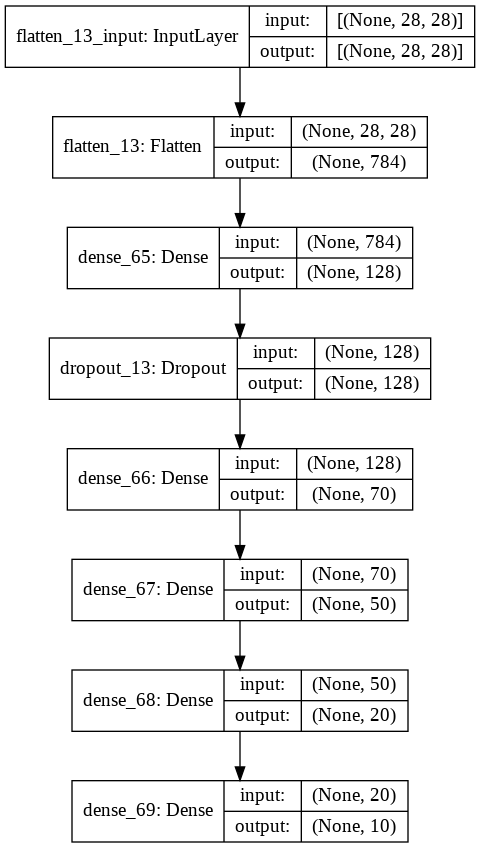

In [ ]:
plot_model(model, show_shapes = True)

In [ ]:
# making predictions

y_probs = model.predict(X_test)
y_preds = y_probs.argmax(axis = 1)



#Confusion Matrix

In [ ]:
# function for confusion matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

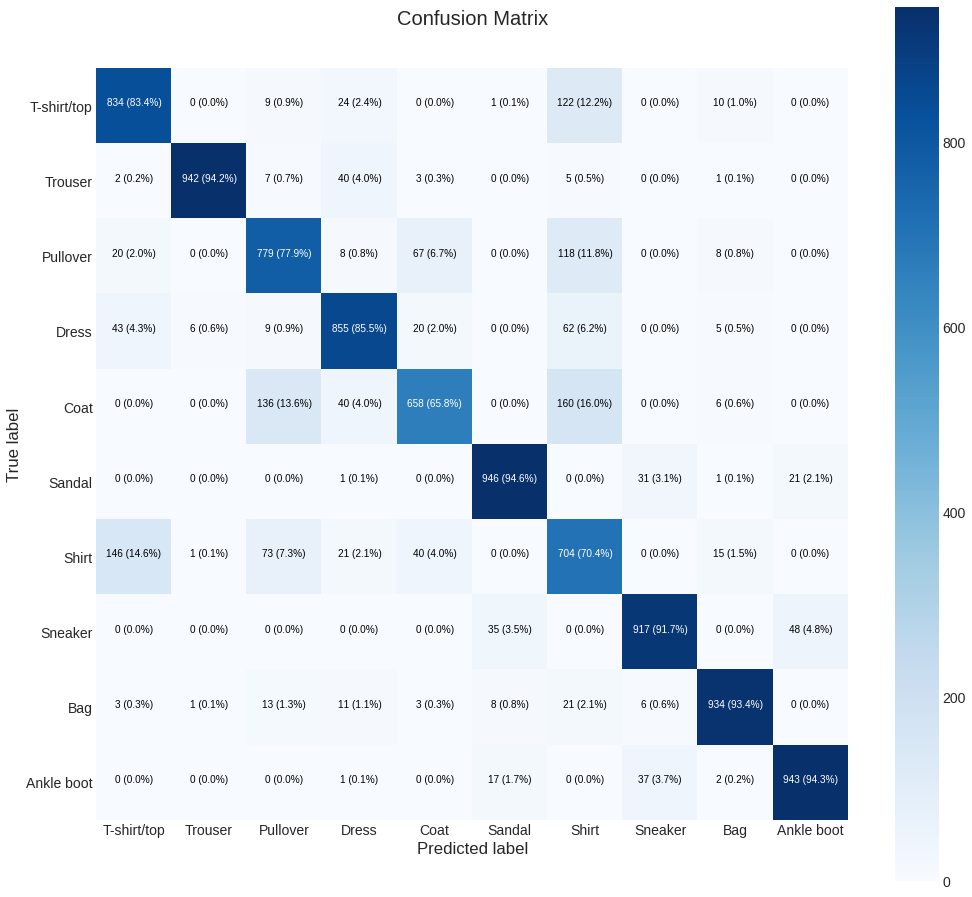

In [ ]:
plt.style.use('seaborn-dark')
make_confusion_matrix(y_true=y_test, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

# Classification Report

In [ ]:
#classification report
from sklearn.metrics import classification_report

target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_test, y_preds, target_names= target_names))
print(classification_report(y_test, y_preds, target_names= class_names))

              precision    recall  f1-score   support

     Class 0       0.80      0.83      0.81      1000
     Class 1       0.99      0.94      0.97      1000
     Class 2       0.76      0.78      0.77      1000
     Class 3       0.85      0.85      0.85      1000
     Class 4       0.83      0.66      0.73      1000
     Class 5       0.94      0.95      0.94      1000
     Class 6       0.59      0.70      0.64      1000
     Class 7       0.93      0.92      0.92      1000
     Class 8       0.95      0.93      0.94      1000
     Class 9       0.93      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.83      0.81      1000
     Trouser       0.99      0.94      0.97      1000
    Pullover       0.76      0.78      0.77      1000
       Dress       0.85 

It's apparent that class 6 (Shirt) is worst performing in terms of both precision and recall while class 1 (Trouser) is best performing.

In [ ]:
pred_label = []
true_label = []
pred_prob = []
for i in range(len(y_test)):
  target_image = X_test[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label.append(class_names[pred_probs.argmax()])
  true_label.append(class_names[y_test[i]])
  pred_prob.append(float(100*tf.reduce_max(pred_probs)))

In [ ]:
pred_df = pd.DataFrame(list(zip(y_test, pred_label, pred_prob, true_label,)),
              columns=['y_test','pred_label', 'pred_prob','true_label'])

In [ ]:
#get the indices to be plotted

incorrect = np.nonzero(y_preds!=y_test)[0]

In [ ]:
pred_df

,y_test,pred_label,pred_prob,true_label
0,9,Ankle boot,76.785797,Ankle boot
1,2,Pullover,93.970039,Pullover
2,1,Trouser,99.879372,Trouser
3,1,Trouser,99.834946,Trouser
4,6,Shirt,79.447052,Shirt
...,...,...,...,...
9995,9,Ankle boot,99.772591,Ankle boot
9996,1,Trouser,98.420731,Trouser
9997,8,Bag,78.173813,Bag
9998,1,Trouser,99.462044,Trouser


In [ ]:
incorrect_df = pred_df[pred_df.index.isin(list(incorrect))]

In [ ]:
incorrect_df = incorrect_df.groupby('y_test')['pred_prob'].nlargest(2)

In [ ]:
incorrect = []
for i in range(20):
    incorrect.append(incorrect_df.index[i][1])

# Most incorrectly classified images

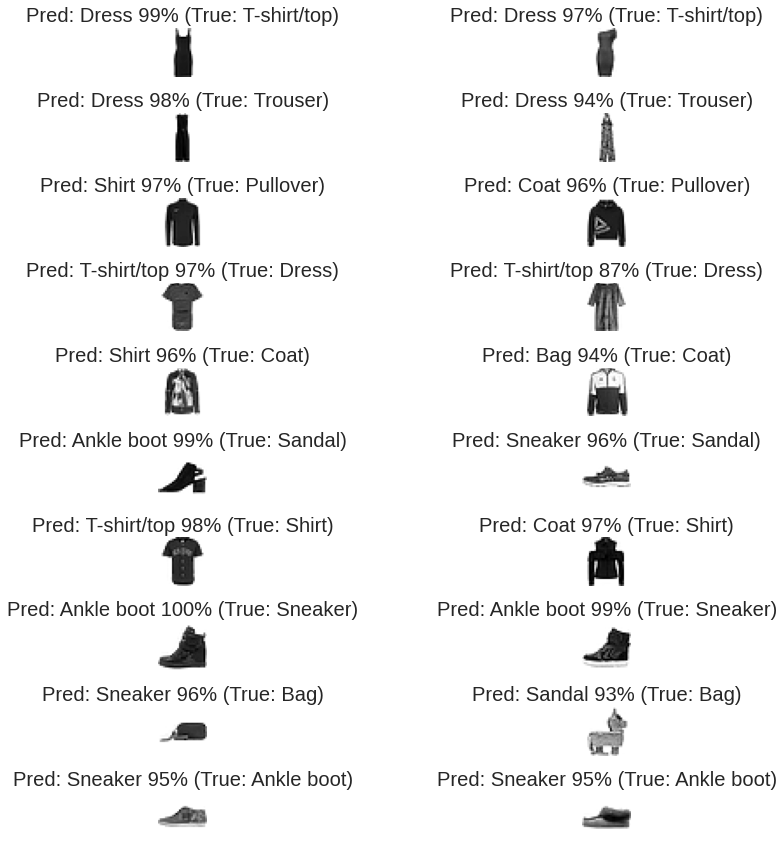

In [ ]:
# Plot two sample most incorrectly classified images for each class in test dataset
plt.figure(figsize=(12, 12))
n_rows = 10
n_cols = 2

for i in range(n_rows * n_cols):
    ax = plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(X_test[incorrect[i]], cmap='binary')
    plt.axis('off')
    plt.title("Pred: {} {:2.0f}% (True: {})".format(pred_df.loc[incorrect[i]]['pred_label'],
                                                   pred_df.loc[incorrect[i]]['pred_prob'],
                                                   pred_df.loc[incorrect[i]]['true_label']))
plt.tight_layout()
plt.show()

# Hyperparameter Tuning

## Network Depth: Change the number of hidden layers and hidden units for each layer

In [ ]:
#hyperparamter tuning - changing network depth
model_depth = keras.models.Sequential([
      keras.layers.Flatten(input_shape = [28, 28]),
      keras.layers.Dense(128, activation = 'relu',kernel_regularizer=regularizers.l2(0.01)),
      keras.layers.Dense(70, activation = 'relu',kernel_regularizer=regularizers.l2(0.01)),
      keras.layers.Dense(32, activation = 'relu',kernel_regularizer=regularizers.l2(0.01)),
      keras.layers.Dense(10, activation = 'softmax')
  ])

In [ ]:
# compiling model
model_depth.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), metrics = ['accuracy'])

In [ ]:
model_fit_depth = model_depth.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 100, batch_size=32)

Epoch 1/100
1719/1719 [==============================] - 6s 3ms/step - loss: 2.5113 - accuracy: 0.6953 - val_loss: 1.4562 - val_accuracy: 0.7988
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 1.2510 - accuracy: 0.8052 - val_loss: 1.0942 - val_accuracy: 0.8178
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0407 - accuracy: 0.8140 - val_loss: 0.9700 - val_accuracy: 0.8234
Epoch 4/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.9490 - accuracy: 0.8188 - val_loss: 0.9030 - val_accuracy: 0.8260
Epoch 5/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8918 - accuracy: 0.8220 - val_loss: 0.8544 - val_accuracy: 0.8298
Epoch 6/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8533 - accuracy: 0.8226 - val_loss: 0.8293 - val_accuracy: 0.8282
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8245 - accuracy: 0.8244 - val_loss: 0.8004 - val_ac

In [ ]:
# evaluating model
model_depth.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5589 - accuracy: 0.8569


[0.5588626265525818, 0.8568999767303467]

In [ ]:
model_l2 = keras.models.Sequential([
      keras.layers.Flatten(input_shape = [28, 28]),
      keras.layers.Dense(128, activation = 'relu'),
      keras.layers.Dropout(.2),
      keras.layers.Dense(70, activation = 'relu'),
      keras.layers.Dense(50, activation = 'relu'),
      keras.layers.Dense(20, activation = 'relu'),
      keras.layers.Dense(10, activation = 'softmax')
  ])

In [ ]:
# compiling model
model_l2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), metrics = ['accuracy'])

In [ ]:
model_fit_l2 = model_l2.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 100, batch_size=32)

Epoch 1/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.9622 - accuracy: 0.6726 - val_loss: 0.5499 - val_accuracy: 0.8174
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5528 - accuracy: 0.8083 - val_loss: 0.4576 - val_accuracy: 0.8420
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4757 - accuracy: 0.8355 - val_loss: 0.4093 - val_accuracy: 0.8584
Epoch 4/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4355 - accuracy: 0.8471 - val_loss: 0.3868 - val_accuracy: 0.8664
Epoch 5/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4077 - accuracy: 0.8554 - val_loss: 0.3676 - val_accuracy: 0.8702
Epoch 6/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3882 - accuracy: 0.8610 - val_loss: 0.3599 - val_accuracy: 0.8706
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3703 - accuracy: 0.8669 - val_loss: 0.3547 - val_ac

In [ ]:
# evaluating model
model_l2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3859 - accuracy: 0.8911


[0.3858537971973419, 0.8910999894142151]

Original Model

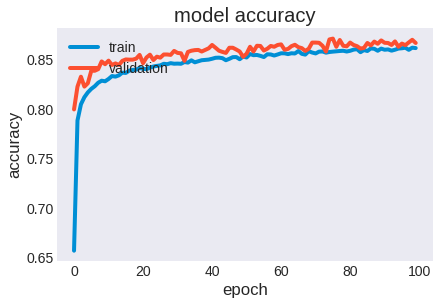

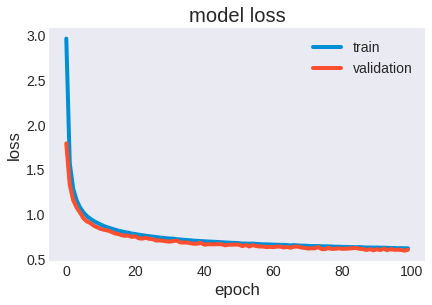

In [ ]:
#  "Accuracy"
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

Model with change in network depth

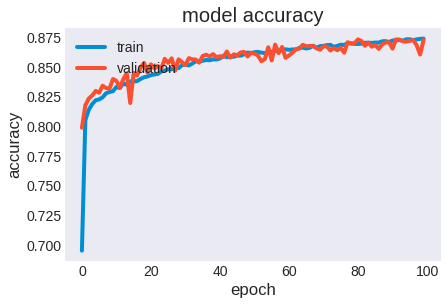

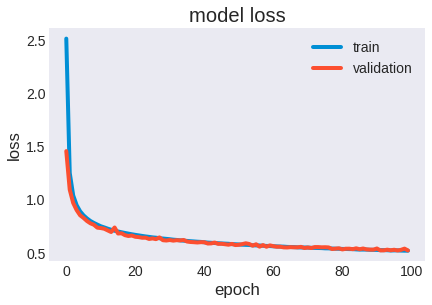

In [ ]:
#  "Accuracy"
plt.plot(model_fit_depth.history['accuracy'])
plt.plot(model_fit_depth.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(model_fit_depth.history['loss'])
plt.plot(model_fit_depth.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

We can see that with the change in number of hidden units and hidden layers, efficiency of validation set has slightly decreased. This may be due to disabling neurons, some of the information about each sample is lost, and the subsequent layers attempt to construct predictions basing on incomplete representations.

## Regularization: Train a model without regularization

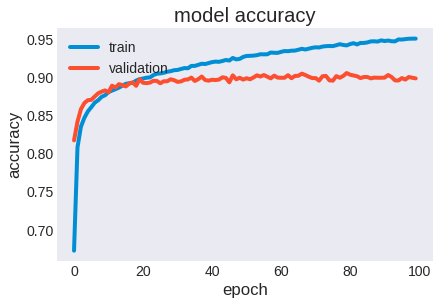

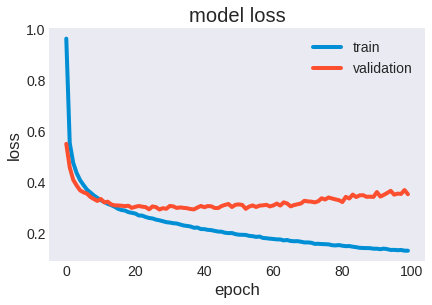

In [ ]:
#  "Accuracy"
plt.plot(model_fit_l2.history['accuracy'])
plt.plot(model_fit_l2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(model_fit_l2.history['loss'])
plt.plot(model_fit_l2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

It can be seen that without l2 regularization, the model is overfitting.

# Conclusion

The model is trained , final training set , and validation set  loss and accuracy along with the confusion matrix is plotted and classification report for the validation dataset printed. The best and worst performing classes are also explained.

Additional models are built for hyperparameter Tuning. The tuning is performed with change in the number of hidden layers anad also without l2 regularization and results compared.